# 0. Load imports 

In [2]:
## imports
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

## print multiple things from same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## load data on 2020 crimes in DC
df = dc_crim_2020 = pd.read_csv("https://opendata.arcgis.com/datasets/f516e0dd7b614b088ad781b0c4002331_2.csv")

# 1. Questions: list comprehension

- In class example, why did we need the "courses" at the beginning of the list iteration
- How did the join syntax work in the example where we paste together offenses from same ward

In [4]:
## toy example

### pool of courses
all_courses = ["QSS20", "QSS17", "GOV10", "GOV4", "CSC1"]


## 1.1 Application 1: filtering to a smaller list

When we might use: have a lot of columns in a dataframe; want to filter to a smaller set using some pattern

In [6]:
### pull out ones that contain GOV in the string
gov_c = [course for course in all_courses if "GOV" in course]
gov_c # result

['GOV10', 'GOV4']

In [8]:
### showing that the "course" is just a placeholder/
### arbitrary interator
gov_c_alt = [x for x in all_courses if "GOV" in x]

gov_c == gov_c_alt

True

In [10]:
"QSS20"[:3]

'QSS'

## 1.2 Application two: keep all objects in the list but do some transformation

In [12]:
all_courses

## strip the numbers from the course names
courses_prefix = [x[:3] for x in all_courses]
courses_prefix # could then find unique elements


['QSS20', 'QSS17', 'GOV10', 'GOV4', 'CSC1']

['QSS', 'QSS', 'GOV', 'GOV', 'CSC']

In [14]:


def manipulate_string(s):
    return s[:3]

[manipulate_string(x) for x in all_courses]

['QSS', 'QSS', 'GOV', 'GOV', 'CSC']

In [16]:
# Join all together example
" #:(# ".join(courses_prefix)

'QSS #:(# QSS #:(# GOV #:(# GOV #:(# CSC'

#### Your turn: Using original list, add "dartmouth_" prefix to the course name

In [84]:
def add_prefix(c):
    return "dartmouth_" + c

[add_prefix(x) for x in all_courses]

['dartmouth_QSS20',
 'dartmouth_QSS17',
 'dartmouth_GOV10',
 'dartmouth_GOV4',
 'dartmouth_CSC1']

## 1.3 Subsetting columns

Use list comprehension to filter to columns with id in the string. Then, create a new dataframe called df1 that contains only column heads with "id"

In [20]:
id_cols = [col for col in df.columns if "ID" in col]
id_cols

## Then, filter the data
df[id_cols]

['BID', 'OBJECTID', 'OCTO_RECORD_ID']

,BID,OBJECTID,OCTO_RECORD_ID
0,NaN,673713315,NaN
1,NaN,673713316,NaN
2,NaN,673713317,NaN
3,NaN,673713318,NaN
4,NaN,673713319,NaN
...,...,...,...
27926,NaN,674255559,NaN
27927,CAPITOL HILL,674255577,NaN
27928,NaN,674255586,NaN
27929,NaN,674255588,NaN


## 1.4 Comprehension for numbers

Here we compare two ways of creating a list of even numbers.

In [38]:
num_list = np.arange(10000)
num_list

array([   0,    1,    2, ..., 9997, 9998, 9999])

In [ ]:
%%time
even_nums = [i for i in num_list if (i % 2) == 0]

In [ ]:
%%time
num_list[~(num_list % 2).astype(bool)]

In [ ]:
num_list[ ~(num_list % 2).astype(bool) ]

#### Your turn: Extract all numbers in num_list that end in 7

In [48]:
end_7 = [i for i in num_list if str(i)[-1] == "7"]


#### Your turn: Divide each number  in num_list by 2

In [52]:
div_2 = [i/2 for i in num_list]

# 2. Questions: lambda functions

Two questions:

- General syntax (see here for a reference: https://www.w3schools.com/python/python_lambda.asp 
- How they work in the context of aggregations

How is a lambda function different from a "normal" user-defined function (that has the syntax def func_name(arg): etc?

- Operates similarly to normal user-defined functions in that it can take any # of arguments
- Operates differently in that it's an "anonymous" function or a function that we don't explicitly name/save in memory

## 2.1 General syntax for lambda functions

In [54]:
### two pools of courses
socsci = ["QSS20", "QSS17", "GOV10"]
natsci = ["BIO2", "PHYS3"]


## generalize some of the steps
## above into a two-arg function
## that takes the course prefix
## and a list of all courses
def filter_courses(prefix, all_courses):
    rel_courses = [c for c in all_courses if prefix in c]
    return(rel_courses)

### a few applications 
filter_courses(prefix = "QSS", all_courses = socsci)
filter_courses(prefix = "QSS", all_courses = natsci)
filter_courses(prefix = "BIO", all_courses = natsci)

['QSS20', 'QSS17']

[]

['BIO2']

In [56]:
## what's the lambda function version of this
filter_courses_v2 = lambda prefix, all_courses: [c for c in all_courses if prefix in c]
filter_courses_v2(prefix = "BIO", all_courses = natsci)


['BIO2']

## 2.2 using alongside agg

In [58]:
## use lambda to find modal block in a ward- multiple ways

### way 1: subsetting agg syntex
df.groupby("WARD")["BLOCK"].agg(lambda x: x.mode())

### way 2: dictionary agg syntax
df.groupby("WARD").agg({"BLOCK": lambda x: x.mode()})


WARD
1                  3100 - 3299 BLOCK OF 14TH STREET NW
2    [1100 - 1199 BLOCK OF NEW YORK AVENUE NW, 1300...
3             5300 - 5399 BLOCK OF WISCONSIN AVENUE NW
4                100  - 199 BLOCK OF CARROLL STREET NW
5            900 - 999 BLOCK OF RHODE ISLAND AVENUE NE
6                       600 - 699 BLOCK OF H STREET NE
7                934 - 1099 BLOCK OF EASTERN AVENUE NE
8               2300 - 2399 BLOCK OF GOOD HOPE ROAD SE
Name: BLOCK, dtype: object

,BLOCK
WARD,
1,3100 - 3299 BLOCK OF 14TH STREET NW
2,"[1100 - 1199 BLOCK OF NEW YORK AVENUE NW, 1300..."
3,5300 - 5399 BLOCK OF WISCONSIN AVENUE NW
4,100 - 199 BLOCK OF CARROLL STREET NW
5,900 - 999 BLOCK OF RHODE ISLAND AVENUE NE
6,600 - 699 BLOCK OF H STREET NE
7,934 - 1099 BLOCK OF EASTERN AVENUE NE
8,2300 - 2399 BLOCK OF GOOD HOPE ROAD SE


#### Your turn: Group by WARD and get the mean and standard deviation (std) of X and Y

In [74]:
#df.groupby("WARD")["Y"].std()
#df.groupby("WARD")["X"].std()

df.groupby("WARD")[["X", "Y"]].std()
df.groupby("WARD")[["X", "Y"]].mean()

,X,Y
WARD,,
1,0.007200,0.006417
2,0.014106,0.005360
3,0.013408,0.013887
4,0.011813,0.013923
5,0.014957,0.012766
6,0.011302,0.010021
7,0.018753,0.012504
8,0.012791,0.015775


,X,Y
WARD,,
1,-77.031256,38.924716
2,-77.038959,38.905941
3,-77.075320,38.941557
4,-77.024905,38.957674
5,-76.989451,38.920249
6,-77.001175,38.893112
7,-76.947402,38.888669
8,-76.988986,38.850526


### Random sampling and distance measures

In [76]:
random_uniform = np.random.rand(5)  # 5 random numbers between 0 and 1
print("Random numbers from uniform distribution:", random_uniform)

random_normal = np.random.randn(5)  # 5 random numbers from a standard normal distribution
print("Random numbers from normal distribution:", random_normal)

Random numbers from uniform distribution: [0.16777818 0.00242736 0.43407431 0.1837119  0.20699974]
Random numbers from normal distribution: [ 0.22148882  0.07680725  0.20514981 -0.68150419 -0.42387956]


<Axes: ylabel='Density'>

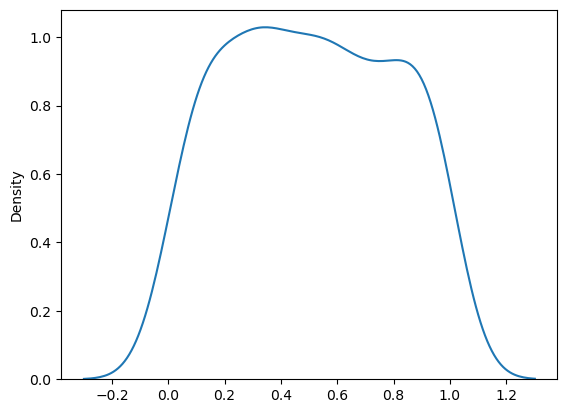

In [78]:
N = 200

sns.kdeplot(np.random.rand(N))

<Axes: ylabel='Density'>

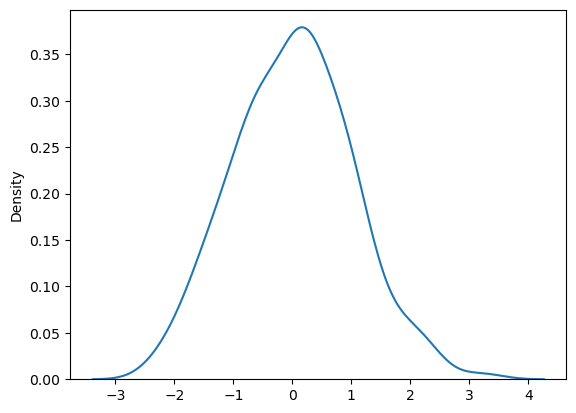

In [80]:
sns.kdeplot(np.random.randn(N))

Your turn: This last portion will consist of computing distances between points.
1. Create a dataframe with four columns (name them X1, Y1, X2, Y2), using np.random.randn(). Each should have a different mean.
2. Create a new column called Manhattan and Euclidean, and compute the distance using apply.
3. Plot the distribution of the two. What do you notice?

In [82]:
np.random.seed(0)  
df = pd.DataFrame({
    "X1": np.random.randn(1000) + 10,
    "Y1": np.random.randn(1000) - 10,
    "X2": np.random.randn(1000) + 5,
    "Y2": np.random.randn(1000)
})

In [89]:
N=1000
X1 = np.random.randn(N) + 0
Y1 = np.random.randn(N) + 5
X2 = np.random.randn(N) + 10
Y2 = np.random.randn(N) + 15

data = ({'X1': X1, 'Y1': Y1, 'X2': X2, 'Y2': Y2})
df1 = pd.DataFrame(data)

df1

df1["Manhattan"] = df1.apply(lambda row: np.abs(row["X1"] - row["X2"]) + np.abs(row["Y1"] - row["Y2"]), axis=1)
df1["Euclidean"] = df1.apply(lambda row: np.sqrt((row["X1"] - row["X2"])**2 + (row["Y1"] - row["Y2"])**2), axis=1)
df1



,X1,Y1,X2,Y2
0,-1.536837,4.534459,8.976485,14.046851
1,1.390596,6.502828,7.474368,15.376519
2,-1.715449,3.404879,9.819007,14.837655
3,0.894271,6.144913,9.983132,15.739056
4,-0.073504,5.725318,10.184708,14.225809
...,...,...,...,...
995,-1.425149,4.479016,10.122074,16.942202
996,0.164820,3.691078,10.563539,16.135341
997,-0.986539,5.348060,9.516581,15.778410
998,1.013609,4.911905,9.259708,15.951410


,X1,Y1,X2,Y2,Manhattan,Euclidean
0,-1.536837,4.534459,8.976485,14.046851,20.025714,14.177995
1,1.390596,6.502828,7.474368,15.376519,14.957464,10.758935
2,-1.715449,3.404879,9.819007,14.837655,22.967232,16.240445
3,0.894271,6.144913,9.983132,15.739056,18.683004,13.215710
4,-0.073504,5.725318,10.184708,14.225809,18.758704,13.322510
...,...,...,...,...,...,...
995,-1.425149,4.479016,10.122074,16.942202,24.010409,16.990273
996,0.164820,3.691078,10.563539,16.135341,22.842982,16.217060
997,-0.986539,5.348060,9.516581,15.778410,20.933470,14.802288
998,1.013609,4.911905,9.259708,15.951410,19.285604,13.779290


(array([ 1.,  4.,  6., 10., 12., 17., 27., 44., 41., 68., 76., 75., 76.,
        86., 64., 88., 66., 63., 50., 39., 25., 18., 17., 13.,  5.,  5.,
         1.,  1.,  0.,  2.]),
 array([14.38178085, 14.79702796, 15.21227506, 15.62752216, 16.04276927,
        16.45801637, 16.87326348, 17.28851058, 17.70375768, 18.11900479,
        18.53425189, 18.94949899, 19.3647461 , 19.7799932 , 20.1952403 ,
        20.61048741, 21.02573451, 21.44098161, 21.85622872, 22.27147582,
        22.68672293, 23.10197003, 23.51721713, 23.93246424, 24.34771134,
        24.76295844, 25.17820555, 25.59345265, 26.00869975, 26.42394686,
        26.83919396]),
 <BarContainer object of 30 artists>)

(array([ 1.,  2.,  9., 10.,  8., 19., 26., 42., 42., 72., 71., 67., 74.,
        91., 60., 87., 75., 61., 47., 42., 29., 19., 20., 12.,  5.,  4.,
         1.,  2.,  0.,  2.]),
 array([10.23372365, 10.52521242, 10.8167012 , 11.10818998, 11.39967876,
        11.69116754, 11.98265632, 12.2741451 , 12.56563388, 12.85712266,
        13.14861144, 13.44010022, 13.731589  , 14.02307778, 14.31456656,
        14.60605534, 14.89754411, 15.18903289, 15.48052167, 15.77201045,
        16.06349923, 16.35498801, 16.64647679, 16.93796557, 17.22945435,
        17.52094313, 17.81243191, 18.10392069, 18.39540947, 18.68689825,
        18.97838702]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, 'Distance Distribution')

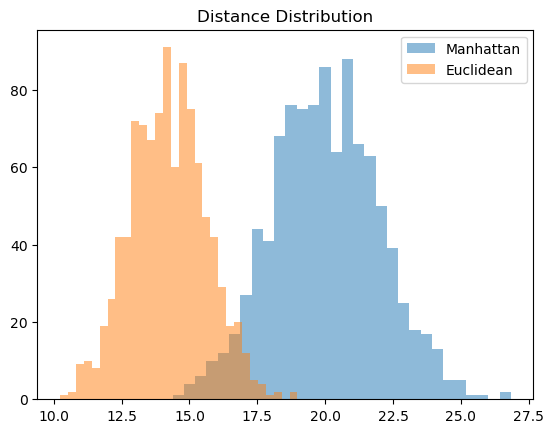

In [91]:
plt.hist(df1["Manhattan"],bins=30,alpha=0.5, label="Manhattan")
plt.hist(df1["Euclidean"],bins=30,alpha=0.5, label="Euclidean")
plt.legend()
plt.title("Distance Distribution")
plt.show()